# 
  - Nama : Nur Pauzi
  - Nim : 201351101
  - Kelas Informatoka Paagi B

# METODE CRISP DM

# 1. Bussiness Understanding

## 
Tahap Bussiness Understanding bertujuan untuk memahami bisnis yang berhubungan dengan penjualan buah-buahn di supermarket, yang nantinya akan dibuat model clustering untuk segmentasi customer


Supermarket biasanya memiliki banyak pelanggan, diantaranya pasti memiliki karakteriktik, hobi, dan kesukaan mereka sendiri. pada kali ini saya akan menentukan loyalitas Pelanggan dan penjualan buah terhadap pelanggan. Nantinya produk buah-buahan yang dijual dapat dikelola lebih baik serta menghindari buah-buahan menjadi busuk,sehingga perlu dilakukan manajemen penjualan yang efektif di supermarket.

Dari data kunjungan pelanggan dapat ditentukan cluster planggan yang loyal maupun yang hanya sekedar membeli buah di supermarket tersebut.Dari hasil cluster tersebut diharapkan dapat menentukan  Bagaimana cara meningkatkan loyalitas pelanggan di supermarket,  Apakah ada program loyalitas yang bisa diperkenalkan atau perlu ditingkatkan? dan bagaimana pihak supermarket untuk memberikan pengalaman berbelanja yang lebih baik dan mendorong pelanggan untuk kembali dan membeli produk yang ditawarkan

Dataset diambil dari Kaggle (https://www.kaggle.com/datasets/whenamancodes/customer-personality-analysis)

# 2. Data Understanding

#
Tahap ini menjelaskan tiap varible yang ada pada data

## 
- ID: ID unik pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status perkawinan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan melakukan komplain dalam 2 tahun terakhir, 0 jika tidak
- MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir

# Import Library

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Membaca Dataset

In [285]:
df = pd.read_csv('marketing_campaign.csv')
print('Total number of data points are:', len(data))

Total number of data points are: 2240


In [286]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# 3. Data Preparation

In [287]:
df.rename(index=str, columns={
    'MntFruits': 'Fruit'
}, inplace=True)

In [289]:
#Meninjau Nilai Yang hilang
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
Fruit                   0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Dari hasil ini diketahui data yang memiliki nilai null terdapat pada data Income sebanyak 24 data

# 4. Data Selection

## 
dari banyaknya data, data yang akan diambil dan di seleksi untuk dibuat model ada dua, yaitu recency dan fruit(penjualan buah)

In [295]:
features =['Recency', 'Fruit']
X = df[features]

In [290]:
print(X)

      Recency  Fruit
0          58     88
1          38      1
2          26     49
3          26      4
4          94     43
...       ...    ...
2235       46     43
2236       56      0
2237       91     48
2238        8     30
2239       40      3

[2240 rows x 2 columns]


# Menentukan jumlah elbow


untuk mengetahui jumalh cluster yang  cocok maka saya menggunakan metode elbow

In [292]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

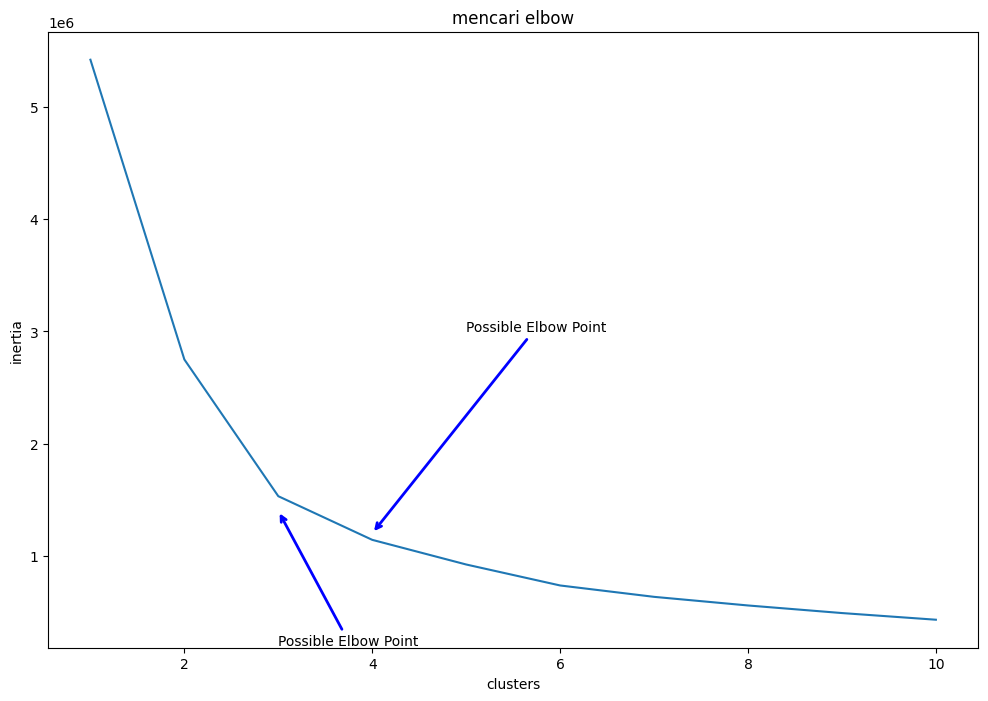

In [277]:
clusters=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Find the elbow point
elbow_point = None
for i in range(1, len(clusters) - 1):
    slope = clusters[i] - clusters[i + 1]
    if elbow_point is None or slope < elbow_point[1]:
        elbow_point = (i + 1, slope)


#Panah
ax.annotate('Possible Elbow Point', xy=(3, 1400000), xytext=(3, 200000),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))
    
ax.annotate('Possible Elbow Point', xy=(4, 1200000), xytext=(5, 3000000),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))



# Display the plot
plt.show()

Dari hasil perhitungan elbow point, didapatkan rekomendasi cluster sebesar 2 hingga 6 cluster. disini saya akan coba ambil 4 cluster

In [293]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\fauzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fauzi\AppData\Local\Temp\ipykernel_10456\2472682596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = kmean.labels_


# 5. Evaluasi data

### Clustering dengan Kmeans

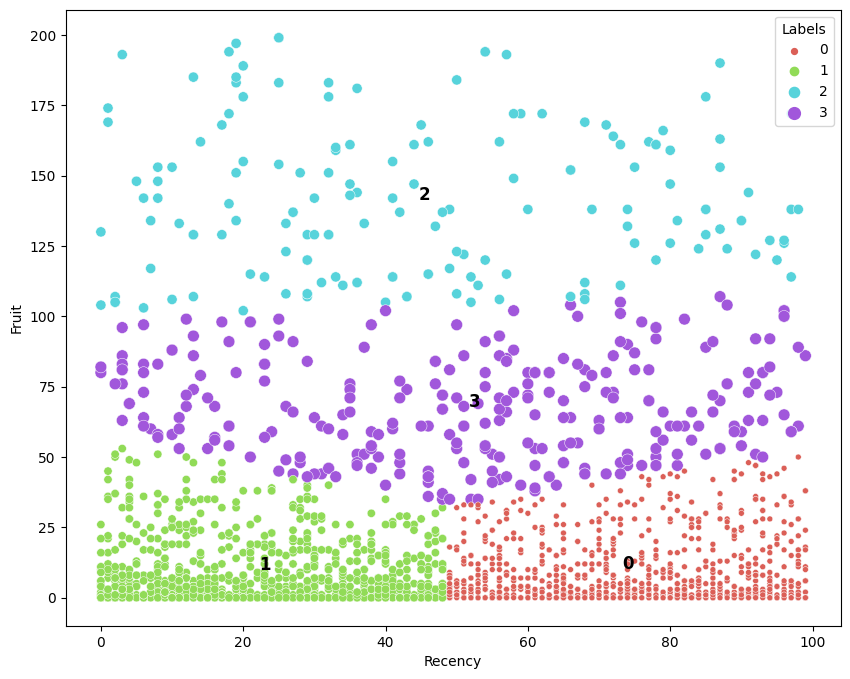

In [294]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Fruit', hue='Labels', markers=True, size='Labels', palette=sns.color_palette('hls', n_clust), data=X)

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['Recency'].mean(),
                  X[X['Labels']==label]['Fruit'].mean()),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 size=12,
                 weight='bold',
                 color='black')
plt.show()

Kesimpulan:
Relasi antara pendapatan recency (terakhir kali customer membeli )/ hari dan produk yang dibeli(fruit) didapat beberapa label yakni:

- 0 = loyal but not like fruit - customer sering datang dan membeli barang, namun bukan buah- buahan, customer ini perlu dipertahankan dan sesekali diabuatkan promosi pada produk buah-buahan agar dapat menarik customer ini  
- 1 = not frequent but buying - customer jarang datang, namun mereka sering membeli buah-buahan. saran saya agar dibuatkan promosi seperti diskon atau paket, agar customer sering datang dan membeli buah-buahan
- 2 = regular fruit buyer - pembeli ini sering membeli buah-buahan di toko dengan jumlah pembelian yang stabil atau cukup sering
- 3 = fruit holic - pembeli menyukai buah-buahan dan membeli buah-buahan dalam jumlah yang banyak 

In [280]:
print(X)

      Recency  Fruit  Labels
0          58     88       2
1          38      1       1
2          26     49       2
3          26      4       1
4          94     43       0
...       ...    ...     ...
2235       46     43       2
2236       56      0       0
2237       91     48       0
2238        8     30       1
2239       40      3       1

[2240 rows x 3 columns]


In [281]:
cluster_size = X.groupby(['Labels'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Labels,size,Percentage
0,0,882,0.393750
1,1,905,0.404018
2,2,292,0.130357
3,3,161,0.071875


persentasi cluster dapat diketahui dari tabel diatas

In [300]:
X.to_excel('output_cluster_market.xlsx')

# Save Model

In [302]:
import pickle

In [305]:
pickle.dump(kmean, open('output_marketing_fruit.sav','wb'))

In [120]:
import matplotlib
import seaborn
import pandas
import seaborn as sns
import sklearn
import openpyxl
import streamlit

print("Versi Seaborn:", sns.__version__)
print("Versi scikit-learn:", sklearn.__version__)
print("Versi openpyxl:", openpyxl.__version__)


print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)
print("Pandas version:", pandas.__version__)

Versi Seaborn: 0.12.2
Versi scikit-learn: 1.2.2
Versi openpyxl: 3.1.2
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Pandas version: 1.5.3
